<a href="https://colab.research.google.com/github/doanthanhnam1/DoanThanhNam/blob/main/vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets  import mnist
import matplotlib.pyplot as plt
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
print(len((train_images,train_labels)))

11490434/11490434 [==============================] - 0s 0us/step
2


In [2]:
print((train_images,train_labels),(test_images,test_labels))


(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

so nay la:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2  18  46 136 136
  244 255 241 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15  94 163 253 253 253 253
  238 218 204  35   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 131 25

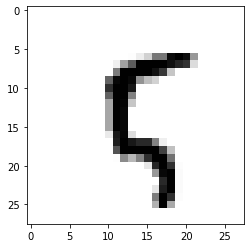

In [3]:
hinh=train_images[100]
plt.imshow(hinh,cmap=plt.cm.binary)
plt.show
print('so nay la: ',train_images[100])

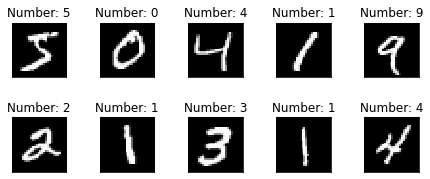

In [4]:
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap='gray',interpolation='None')
  plt.title('Number: {}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])


In [5]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(Dense(512,input_shape=(28*28,),activation="relu"))

model.add(Dense(1,activation="linear"))
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fb3231f65e0>>

In [6]:
train_images=train_images.reshape((60000,28*28))#chinh lai kich thuoc au du lieu dau vao
train_image= train_images.astype('float32')/255# chuyen qua float de co the chia duoc

test_images=test_images.reshape((10000,28*28))
test_image= test_images.astype('float32')/255

from keras.utils import to_categorical #chuyen thanh one_hot_encoding
train_label= to_categorical(train_labels,10)# chyen thanh 10 bit one hot encoding
test_label= to_categorical(test_labels,10)
print(test_label)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=10,batch_size=128)#qua trinh train, moi lan hoc 128 voi 10 lan hoc lai
test_lost,test_acc=model.evaluate(test_images,test_labels)
print('test_accuracy',test_acc)
print('test_lost',test_lost)

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 5.3095e-07 - accuracy: 0.1445
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 5.3095e-07 - accuracy: 0.1445
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 5.3095e-07 - accuracy: 0.1445
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 5.3095e-07 - accuracy: 0.1445
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 5.3095e-07 - accuracy: 0.1445
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 5.3095e-07 - accuracy: 0.1445
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 5.3095e-07 - accuracy: 0.1445
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 5.3095e-07 - accuracy: 0.1445
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 5.3095e-07 - accuracy: 0.1445
Epoch 10/10
313/313 [==============================] - 1s 2ms/st

In [11]:
model.save('model1.h5')


In [14]:
model11=load_model('model1.h5')
label1=model11.predict(test_image[10])

NameError: ignored